In [1]:
"""
mostly for tested visualizator
import torch
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
"""
import torch.nn as nn
import  image_loader as il
import property as P
import visualize as vs
import gain as gn
from torchvision import models
from torch.utils.data import DataLoader

/home/nikita/anaconda3/envs/ml-diplom/lib/python3.7/site-packages/torchvision/transforms/transforms.py:210: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [2]:
alex = models.alexnet(pretrained=True)
print(alex)
num_features = alex.classifier[6].in_features
alex.classifier[6] = nn.Linear(num_features, 5) # output labels
last_registred_layer= "features.10"

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [6]:
loader = il.DatasetLoader.initial()
train = loader.load_tensors(0, 2)
test = loader.load_tensors(400, 450)

train_set = DataLoader(il.ImageDataset(train), batch_size=2, shuffle=True, num_workers=4)
test_set = DataLoader(il.ImageDataset(test), batch_size=10, shuffle=True, num_workers=4)

In [7]:
gain_network = gn.GAIN(alex, last_registred_layer, gpu=True)

current_model, best_model_w = gain_network.train(train_set, 50)

End epoch: 1/51
Total Loss: 4942179.6, classification loss: 0.14305505752563477, loss AM: 0.08222168087959289, loss segments: 4942.179296875
End epoch: 2/51
Total Loss: 4942180.4, classification loss: 0.1374068260192871, loss AM: 0.08185086250305176, loss segments: 4942.180078125
End epoch: 3/51
Total Loss: 4942161.6, classification loss: 0.1419348120689392, loss AM: 0.0677126944065094, loss segments: 4942.161328125
End epoch: 4/51
Total Loss: 4942000.0, classification loss: 0.1367193341255188, loss AM: 0.07174245715141296, loss segments: 4941.999609375
End epoch: 5/51
Total Loss: 4942159.6, classification loss: 0.12536596059799193, loss AM: 0.07184983491897583, loss segments: 4942.159765625
End epoch: 6/51
Total Loss: 4942150.8, classification loss: 0.13676507472991944, loss AM: 0.07642935514450074, loss segments: 4942.150390625
End epoch: 7/51
Total Loss: 4941923.6, classification loss: 0.13245187997817992, loss AM: 0.08376172184944153, loss segments: 4941.923046875
End epoch: 8/51
T

last model:
train set:


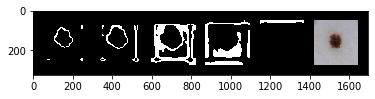

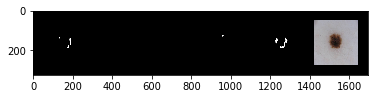

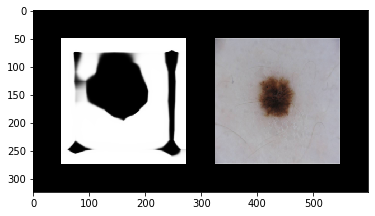

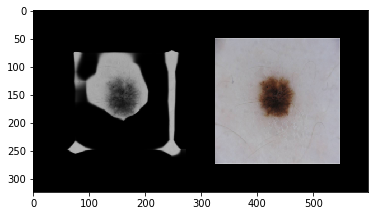

<Figure size 432x288 with 0 Axes>

In [8]:
def visualize_trained_model(m, data_set, elements):
    m.eval()
    for idx, (inputs, segments, labels, trust_segments) in enumerate(data_set):
        if idx > elements:
            continue
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        segments = segments.to('cuda')
        _, _, _, _, a_c, t_a_c, i_star = gain_network.forward(m, inputs, segments, labels)
        a_c = a_c.cpu()
        i_star = i_star.cpu()
        inputs = inputs.cpu()
        t_a_c = t_a_c.cpu()
        a_c = a_c * (P.labels_attributes_weight[-1] / a_c.max()) # normalize
        vs.visualize_colorized_tensor(a_c[0], inputs[0])
        vs.visualize_tensor(trust_segments[0], inputs[0])
        vs.visualize_single_tensor(t_a_c[0], inputs[0])
        vs.visualize_single_tensor(i_star[0], inputs[0])

print("=" * 20)
print("=" * 20)
print("last model:")
print("train set:")
visualize_trained_model(current_model, train_set, 3)

last model:
test set:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


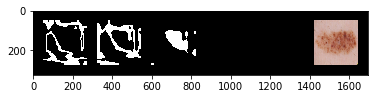

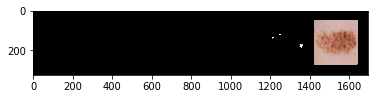

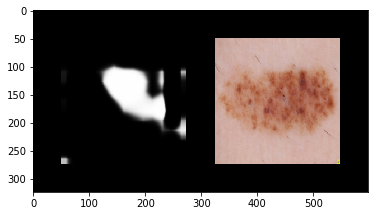

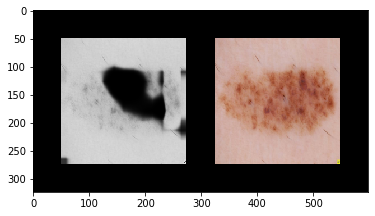

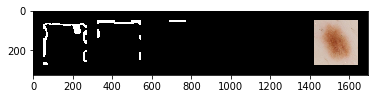

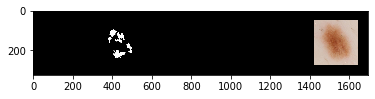

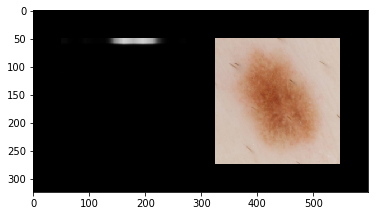

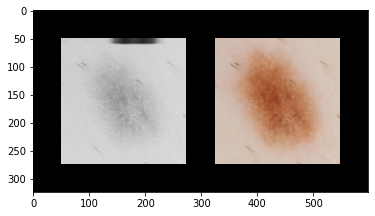

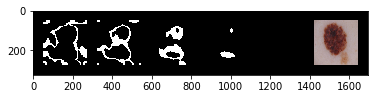

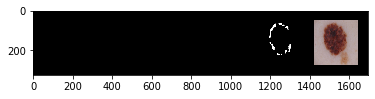

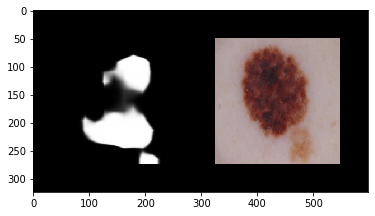

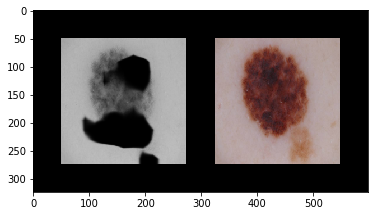

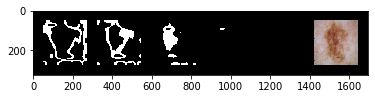

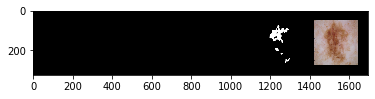

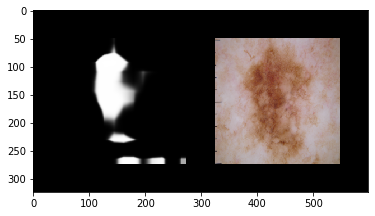

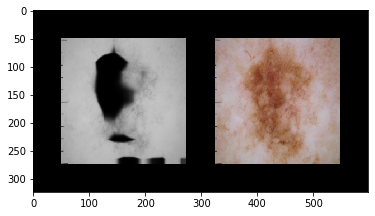

<Figure size 432x288 with 0 Axes>

In [15]:
print("=" * 20)
print("=" * 20)
print("last model:")
print("test set:")
visualize_trained_model(current_model, test_set, 3)

In [16]:
alex.load_state_dict(best_model_w)

<All keys matched successfully>

best model:
train set:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


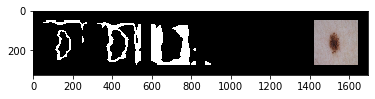

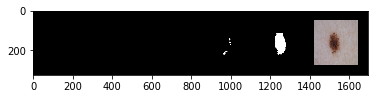

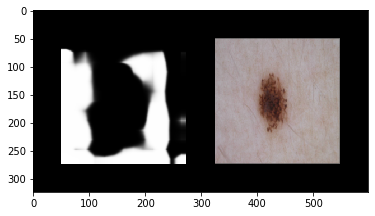

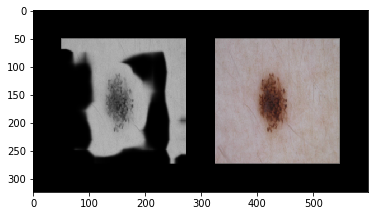

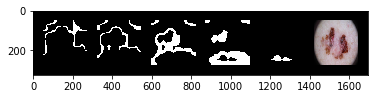

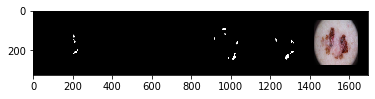

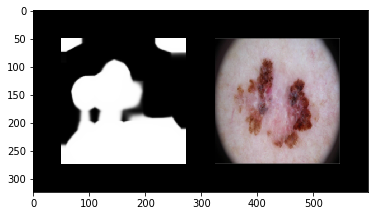

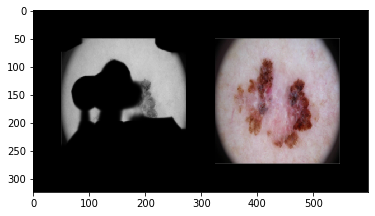

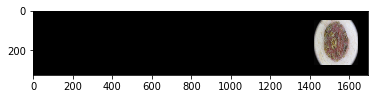

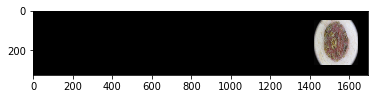

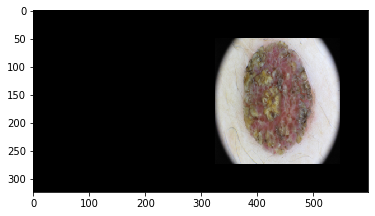

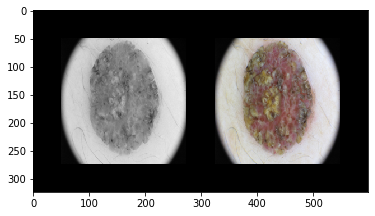

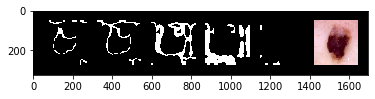

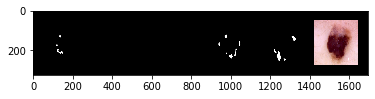

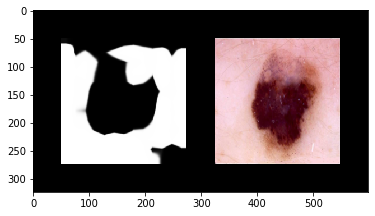

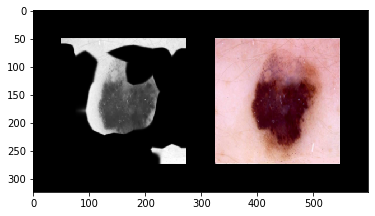

<Figure size 432x288 with 0 Axes>

In [17]:
print("=" * 20)
print("=" * 20)
print("best model:")
print("train set:")
visualize_trained_model(alex, train_set, 3)

best model:
test set:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


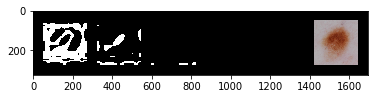

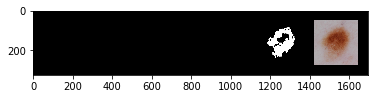

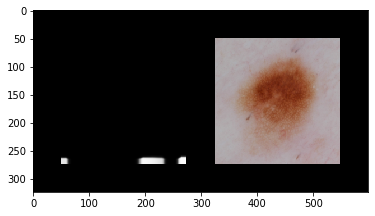

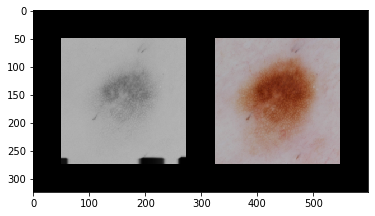

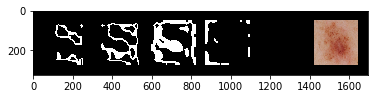

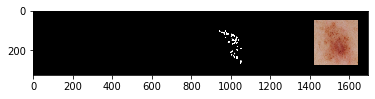

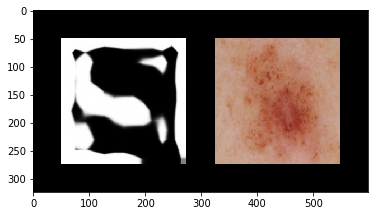

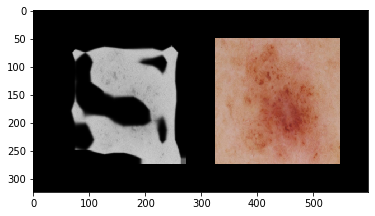

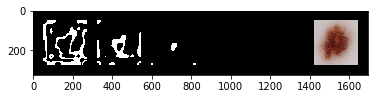

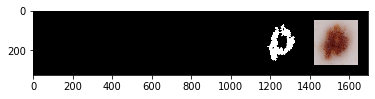

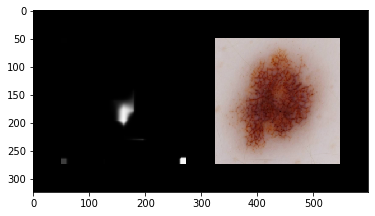

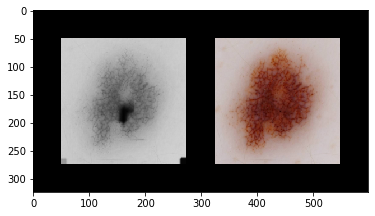

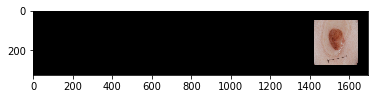

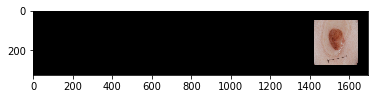

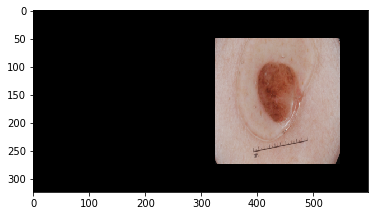

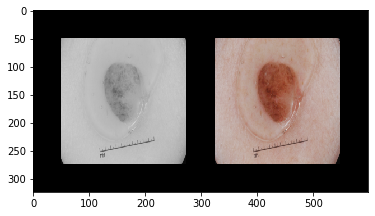

<Figure size 432x288 with 0 Axes>

In [18]:
print("=" * 20)
print("=" * 20)
print("best model:")
print("test set:")
visualize_trained_model(alex, test_set, 3)